[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UVADS/DS1001/blob/master/ddsbook/analytics-lab-IIa.ipynb)

In [1]:
# pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm


#### What we are going to do is create a linear model using old faithful data. Then we are going to add Gaussian noise iteratively to a dataset and pass the new noisy dataset to a the same linear regression model and track the ability of the model to learn the target as noise increases. 

1. Read this brief wiki on garbage in garbage out: [article](https://en.wikipedia.org/wiki/Garbage_in,_garbage_out)  

2. Work through the below notebook, paying close attention to the comments and the outputs of the code. 

3. Answer the questions at the end as they relate to the process of adding noise to a dataset and then passing it to a linear regression model.

In [2]:
# The dataset we will be using is a well known measure of eruption and wait times for old faithful. 
# Take a look at the documentation 
# here: https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/faithful


# This is our data source (.tsv == tab separated), here we are creating a variable that holds the url to the data.
# If you click the {x} in the ribbon to the left you will see the variables you have created.
url="https://gist.githubusercontent.com/curran/4b59d1046d9e66f2787780ad51a1cd87/raw/9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv"


# Here we are reading in the data, and use the "tab" as a separator so the data will be loaded 
# in correctly.  pd stands for pandas and "pd.read_csv" is the function we are 
# using to read in the data from the url.
old_faith = pd.read_csv(url, sep='\t')


#### Let's take a quick look at a scatter plot to get an idea of the distribution of the data. 

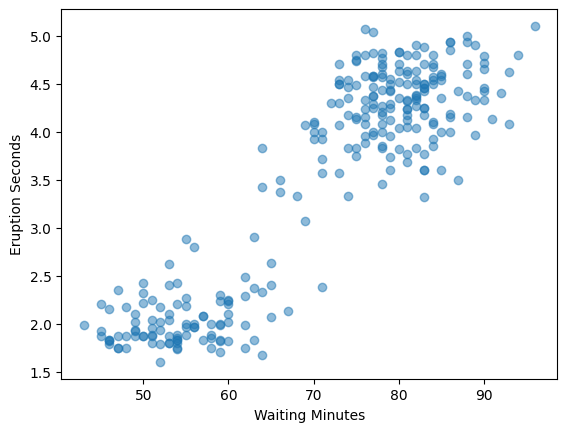

In [3]:
#plt (matplotlib.pyplot) is the library we are using to create our scatter plot.  We are using the "scatter" function, 
# and the alpha is the transparency of the dots.
plt.scatter(old_faith.waiting,old_faith.eruptions, alpha=0.5)
# here we are adding the labels to the x and y axis
plt.ylabel("Eruption Seconds")
plt.xlabel("Waiting Minutes")

#this is the function that renders the plot
plt.show()

# Note the patterns that you see, (you'll need this for your submission) 

#### Next lets build a linear regression model to predict Eruption Length based on Waiting Time 

In [4]:
#Here we are using the statsmodels library to create a linear regression model. sm stands for statsmodels and OLS 
# stands for Ordinary Least Squares.  We are using the "fit" function to fit the model to the data.
lm = sm.OLS(old_faith['waiting'],old_faith['eruptions']).fit()

# Now we are printing out the summary of the model (lm). The summary function will give you the R2 measure, along with 
# other measures of model fit. 
lm.summary()

#Using the R2 measure, how well does the model predict eruption length (scale of 0 to 1,
#  where 1 is perfect, again needed for your submission)?

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                waiting   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              9621.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):                   9.97e-214
Time:                        13:13:46   Log-Likelihood:                         -1060.7
No. Observations:                 272   AIC:                                      2123.
Df Residuals:                     271   BIC:                                      2127.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eruptions     19.4019      0.198     98.086      0.000      19.013      19.791
==============================================================================
Omnibus:                       31.065   Durbin-Watson:                   2.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.019
Skew:                           0.148   Prob(JB):                      0.00667
Kurtosis:                       2.108   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now we are creating "noise" that aligns to a normal or gaussian distribution, thus gaussian noise, to add to the data.

In [5]:
# mu= mean and sigma = standard deviation, these are the inputs you will be changing
mu, sigma = 0, .5 
# We need to create noise with the same dimensions as the dataset (272,2), this will allow us 
# to combine them easily
noise = np.random.normal(mu, sigma, [272,2])
# The print function will print the first 5 rows of the noise array 
print(noise[0:5])

[[ 0.09007393 -0.9214669 ]
 [-0.21921124  0.35209499]
 [ 0.01062069  0.1441665 ]
 [ 0.04689331  0.35237132]
 [-0.33441713  0.99912937]]


#### Really a small change, let's see what happens to model quality

In [6]:
# Here we are adding the noise to the dataset
old_faith_1=old_faith + noise

#Create a new model with the noise added to the data
lm_1 = sm.OLS(old_faith_1['waiting'],old_faith_1['eruptions']).fit()

#Checking the R2 number, note what happens.
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                waiting   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              5910.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):                   4.73e-186
Time:                        13:13:46   Log-Likelihood:                         -1124.8
No. Observations:                 272   AIC:                                      2252.
Df Residuals:                     271   BIC:                                      2255.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eruptions     19.0830      0.248     76.876      0.000      18.594      19.572
==============================================================================
Omnibus:                        2.474   Durbin-Watson:                   2.352
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.064
Skew:                           0.088   Prob(JB):                        0.356
Kurtosis:                       2.612   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now let's take a look at that same scatter plot but with the new data

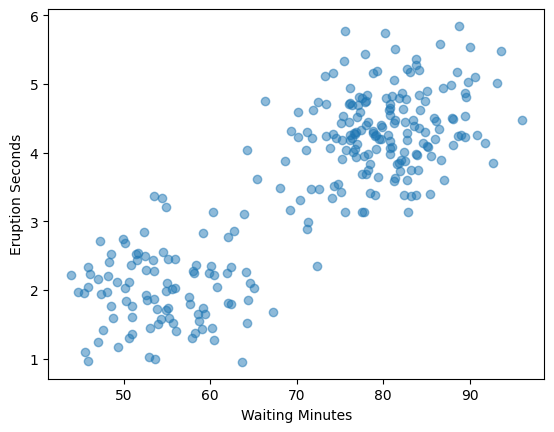

In [7]:
plt.scatter(old_faith_1.waiting,old_faith_1.eruptions, alpha=0.5)
plt.ylabel("Eruption Seconds")
plt.xlabel("Waiting Minutes")

plt.show()


#### Task 1: Slowly change the standard deviation (increments of .25, stopping at 3.5), add the noise array to the dataset with each increase, re-run the model and see what happens with the R2 number, note the pace of change of the model (write it down).  

#### Task 2: Following the same process above but instead adjust the mean to three different increasing increments but leave the standard dev at .05, note how this changes the model fit.  

## Questions for submission: 

1. What patterns do you see in the original data (from the scatter plot)? 

2. How well did the first model fit the original data (from the model output)? 

3. What happens when you add the standard deviation oriented noise to the data, at what level does the model appear to degrade significantly?

4. What happens when you add the mean noise to the data while holding the standard dev constant, does the model degrade at the same level as the standard deviation noise? Why or why not?

5. Explain the concept behind noise versus signal as it relates to the old faithful dataset, how does this relate to garbage in garbage out?  

6. Explain what the linear regression model is doing.